In [58]:
import pandas as pd
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [6]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [7]:
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [8]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
x = df.drop(columns = 'charges')

In [10]:
y = df['charges']


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
c = lr.intercept_
c

-11336.126290161259

In [32]:
m = lr.coef_
m

array([  251.1875747 ,  -349.80765702,   331.69751807,   440.96940482,
       24326.91909522,  -434.82676264])

In [40]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([15659.65729659,  4030.17675387, 11144.32500754, 27932.28138178,
        7002.92860387, 38600.41060112, 14182.97078415, 14017.79123605,
       12860.85613514,  7974.29786046, 35373.2353945 , 13067.87763416,
       12661.85451864,  9642.02213152,  8293.93504228,  5173.04075738,
       29446.04945211, 10499.88682398,  3172.76700748,  9505.92937571,
       13957.11012775, 28850.71912307, 34000.84369558, 13073.10457413,
       10179.73477485,  8089.18865301, 40983.33221678,  3908.42458292,
       29653.43694982, 11531.74486722,  4021.79793398, 40016.12615447,
        5313.82744125,   713.25845157, 25713.23719057, 12689.36587513,
       10652.15246365,  5870.98955951, 32722.95906196,  4976.49079386,
        4053.5651668 , 13381.04672111,  7345.80074958, 11547.50077855,
       29312.7610868 ,  2136.60498957,  9932.20239016, 10501.52660402,
       40678.40382826, 14149.90591908, 16213.11268808,  5178.45599157,
        7225.14294478,  8613.05389678,  8519.18432912, 30581.05448897,
      

In [42]:
import matplotlib.pyplot as plt

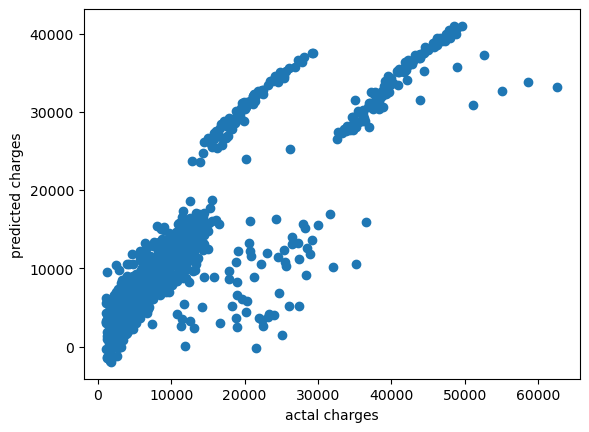

In [52]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('actal charges')
plt.ylabel('predicted charges')
plt.show()

In [62]:
r2_score(y_train,y_pred_train)

0.7656535632760562